# k-nearest-neighbour implementation with example

First we import the necessary libraries.

In [22]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

Next we plot 3 blops/cluster (i.e. classes).

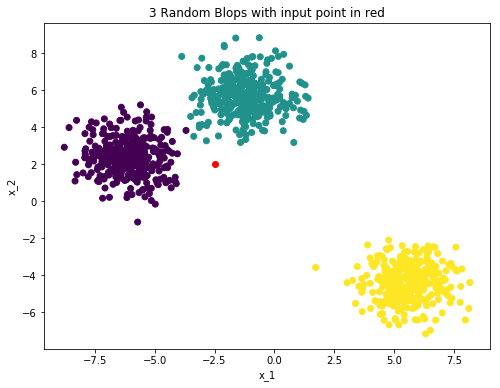

In [23]:
np.random.seed(1234)
X, y = make_blobs(n_samples=1000, centers=3)
fig = plt.figure(figsize=(8, 6))
x1, x2 = -2.5, 2
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(x1, x2, c='red')
plt.title("3 Random Blops with input point in red")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

Implementation of the kNN classifier.

In [24]:
def kNN(input, data, labels, k, weights=[]):
    '''
    Return the k-nearest-neighbour classification with respect to ``data``
    of ``input``. If ``weights`` is empty, then compute the classical kNN.
    '''
    if k > len(data):
        raise NameError('k is larger than the size of the data')
    distances = [(np.dot(input-item, input-item), item, label)
                 for item, label in zip(data, labels)]
    sorted_distances = sorted(distances, key=lambda tupel: tupel[0])
    candidates = sorted_distances[:k]
    candidate_labels = [label for dist, datapoint, label in candidates]
    res = {}
    if weights:
        classes = list(set(candidate_labels))
        weightmajority = [0]*len(classes)
        for ind, clas in enumerate(classes):
            weightmajority[ind] = np.sum(np.array(weights) *
                                         (np.array(candidate_labels) == clas))
        res['prediction'] = classes[np.argmax(weightmajority)]
    else:
        freq = Counter(candidate_labels)
        res['prediction'] = freq.most_common(1)
    res['kNN'] = np.array([datapoint for dist, datapoint, label in candidates])
    res['kNN_labels'] = candidate_labels
    return res

Last, we classify a given testpoint with k=5.

[-2.5, 2] belongs to class 1 (i.e. the green dots in this case).


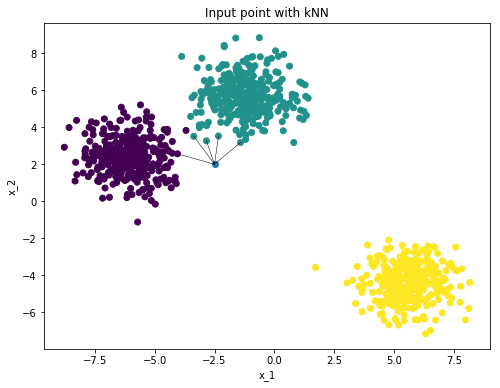

In [25]:
res = kNN([x1, x2], X, y, 5, weights=[0.2, 0.2, 0.2, 0.2, 0.2])
print('{} belongs to class {} (i.e. the green dots in this case).'.format([x1,x2],res['prediction']))
k_NN = res['kNN']
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(x1, x2)
for neighbour in k_NN:
    plt.plot([x1, neighbour[0]],[x2, neighbour[1]], c='black', linewidth=0.5)
plt.title("Input point with kNN")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()